<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%ED%8F%AC%EC%95%84%EC%86%A1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

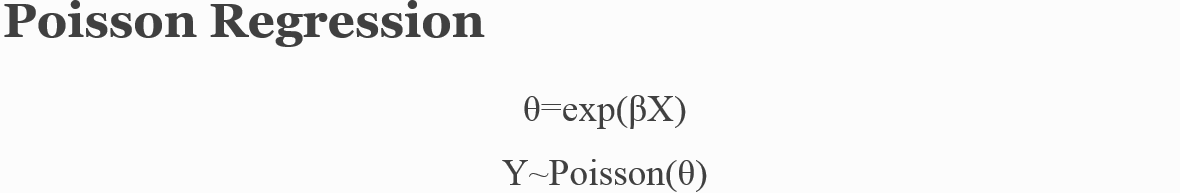

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

import theano.tensor as tt


In [2]:
!git clone https://github.com/hongjai-rhee/public.git
## 데이터 불러오기  
df = pd.read_csv('/content/public/count.csv')
df.head()


fatal: destination path 'public' already exists and is not an empty directory.


,y,x1,x2
0,10,1,0
1,16,1,1
2,7,1,1
3,15,1,0
4,11,1,1


In [3]:
df.groupby(['x1','x2']).mean().unstack()


y           
x2          0          1
x1                      
0    5.375000   2.777778
1   14.315789  11.538462

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


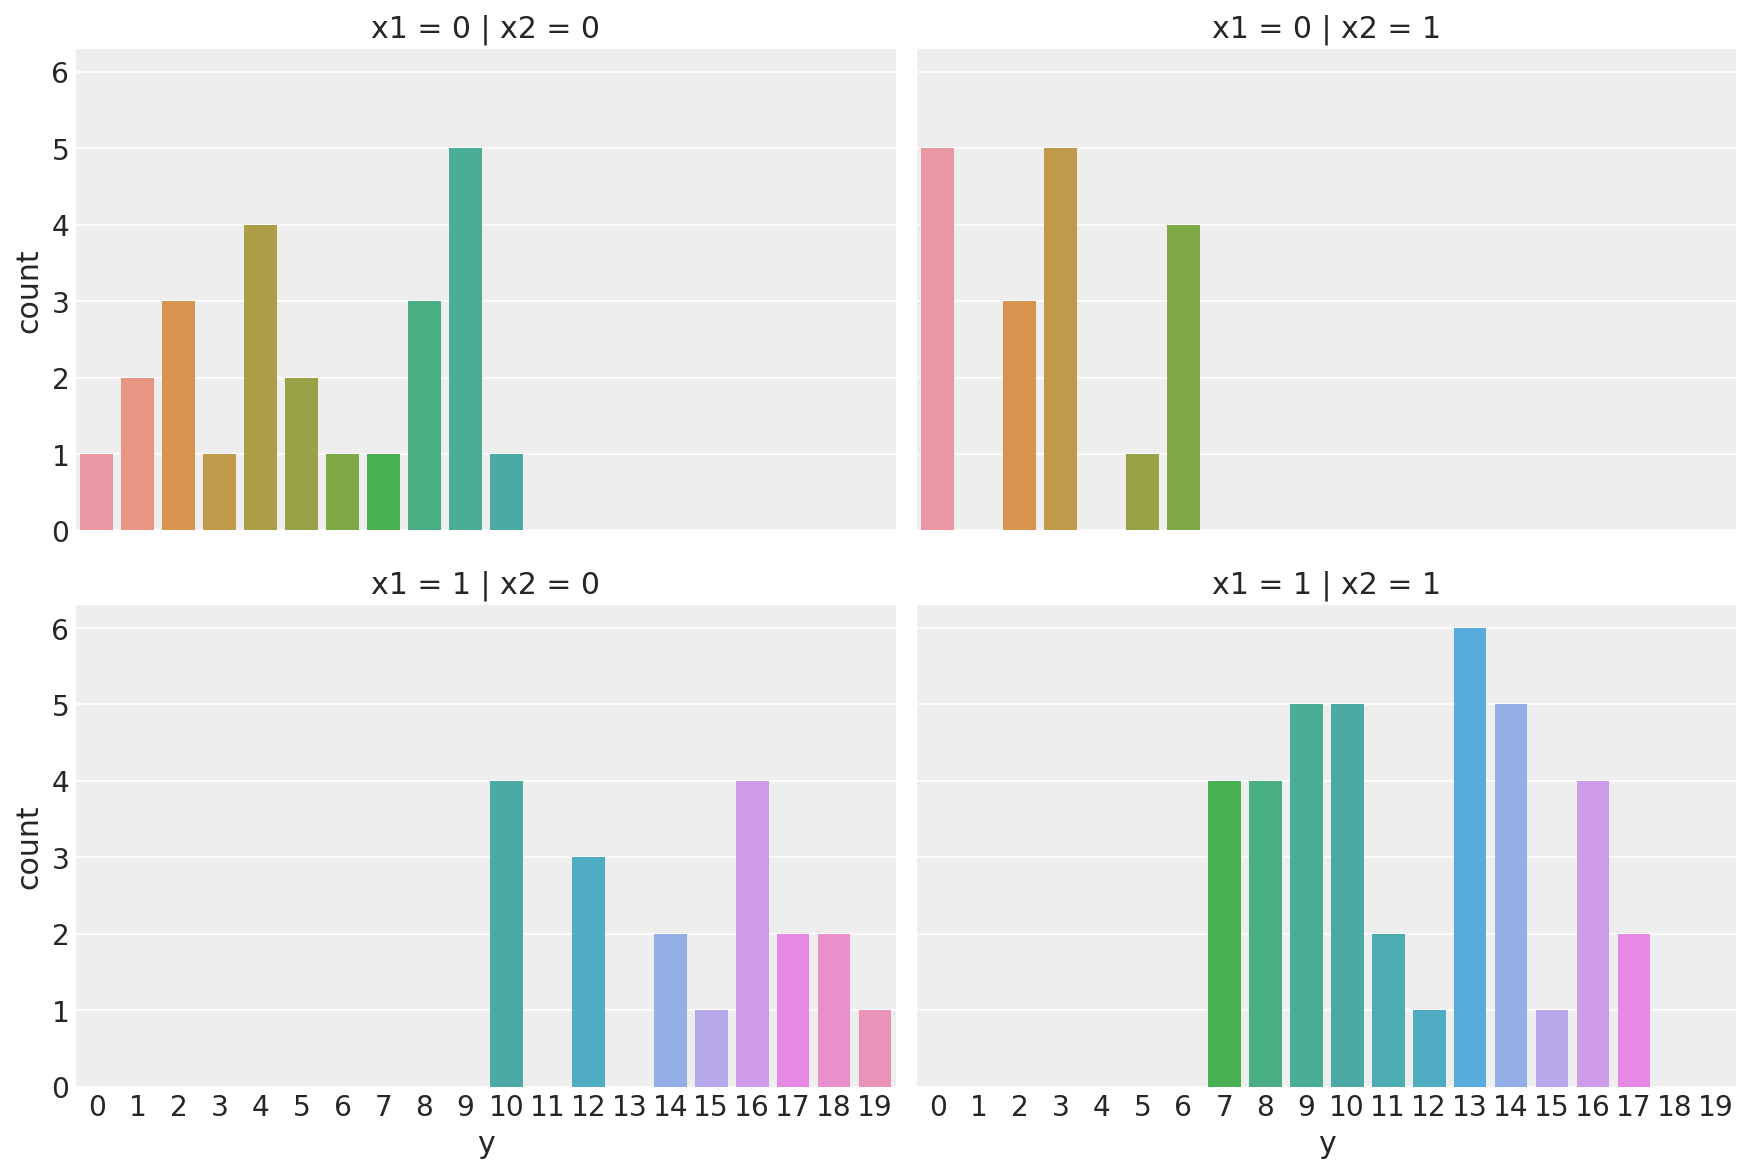

In [4]:
g = sns.factorplot(x='y', row='x1', col='x2', data=df,
               kind='count', size=4, aspect=1.5)


In [5]:
with pm.Model() as count:

    # define priors, weakly informative Normal
    b0 = pm.Normal('b0_intercept', mu=0, sd=10)
    b1 = pm.Normal('b1_x1', mu=0, sd=10)
    b2 = pm.Normal('b2_x2', mu=0, sd=10)
    b3 = pm.Normal('b3_x1:x2', mu=0, sd=10)

    # define linear model and exp link function
    theta = (b0 + b1*df['x1'] + b2*df['x2'] + b3*df['x1']*df['x2'])

    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=np.exp(theta), observed=df['y'].values)

In [6]:

with count:
    trace = pm.sample(2000, tune=1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [b3_x1:x2, b2_x2, b1_x1, b0_intercept]
Sampling chain 0, 0 divergences: 100%|██████████| 3000/3000 [00:06<00:00, 437.38it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac62c25ba8>,
      dtype=object)

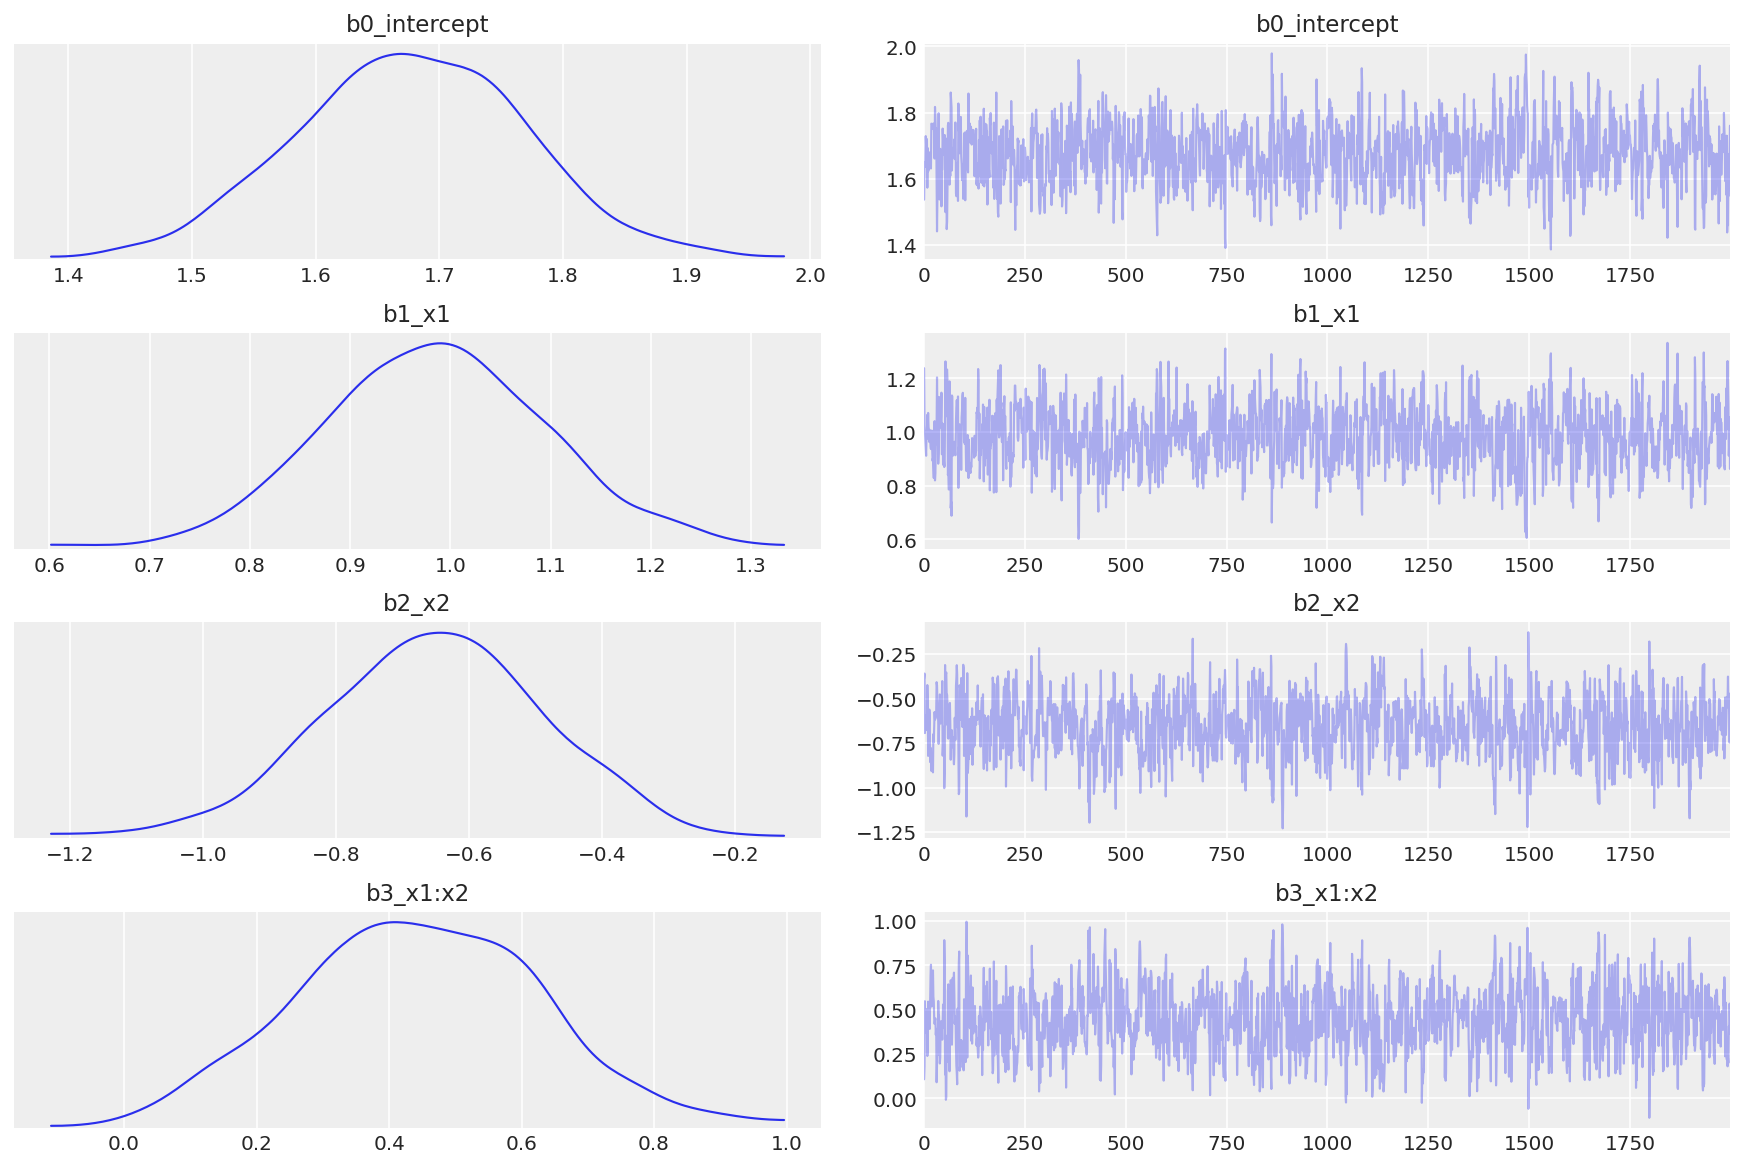

In [7]:
pm.traceplot(trace)

In [8]:
pm.summary(trace)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
b0_intercept,1.676,0.092,1.497,1.841,0.004,0.003,648.0,641.0,651.0,748.0,NaN
b1_x1,0.984,0.112,0.781,1.206,0.004,0.003,658.0,658.0,662.0,755.0,NaN
b2_x2,-0.657,0.167,-0.961,-0.344,0.007,0.005,594.0,594.0,596.0,711.0,NaN
b3_x1:x2,0.441,0.183,0.107,0.786,0.008,0.005,591.0,591.0,594.0,773.0,NaN
